# IHLT - Lab 4

1. Consider Treebank corpus.
    - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

    - Evaluate the resulting 24 models using sentences from 3001.
    
    
2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
    - Which model would you select? Justify the answer.

## Imports

In [1]:
import dill

from os import path
from nltk.tag import tnt, CRFTagger
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import treebank
from matplotlib import pyplot as plt

## 1. Models creation and training

*HMM*, *TnT*, *Perceptron* and *CRF* models are trained using the first sentences of the *Treebank corpus*. For each model, six quantities of sentences (500, 1000, 1500, 2000, 2500 and 3000) are used for the training step, getting a total amount of 24 models.

In [2]:
sentences_amount = [500, 1000, 1500, 2000, 2500, 3000]
HMM = list()
TnT = list()
PER = list()
CRF = list()

In [3]:
for i in sentences_amount:
    
    print("[Training models using the first " + str(i) + " sentences...]", end='\r')
    
    train_data = treebank.tagged_sents()[:i]
    
    trainer = HiddenMarkovModelTrainer()
    HMM.append(trainer.train_supervised(train_data))
    
    TnT_model = tnt.TnT()
    TnT_model.train(train_data)
    TnT.append(TnT_model)
    
    PER_model = PerceptronTagger(load=False)
    PER_model.train(train_data)
    PER.append(PER_model)
    
    CRF_model = CRFTagger()
    CRF_model.train(train_data,'crf_treebank_pos_tagger_' + str(i))
    CRF.append(CRF_model)

print("\n[Training process finished!]")

[Training models using the first 3000 sentences...]
[Training process finished!]


### 1.1 Models saving
Although CRF Models are already saved when the training process ends (`CRF_model.train(train_data, 'model_file')`), the rest of the models require an extra step to save them. 

`dill` will be used to save these models.

In [4]:
for index, i in enumerate(sentences_amount):
    with open("hmm_treebank_pos_tagger_" + str(i), "wb") as f:
        dill.dump(HMM[index], f)
    with open("tnt_treebank_pos_tagger_" + str(i), "wb") as f:
        dill.dump(TnT[index], f)
    with open("per_treebank_pos_tagger_" + str(i), "wb") as f:
        dill.dump(PER[index], f)

### 1.2 Models loading
In order to avoid the training step, it is possible to load pre-trained models that were saved in the previous step.

`dill` will be used to load these models.

In [3]:
for index, i in enumerate(sentences_amount):
    with open("hmm_treebank_pos_tagger_" + str(i), "rb") as f:
        HMM.append(dill.load(f))
    with open("tnt_treebank_pos_tagger_" + str(i), "rb") as f:
        TnT.append(dill.load(f))
    with open("per_treebank_pos_tagger_" + str(i), "rb") as f:
        PER.append(dill.load(f))
    
    if path.isfile('crf_treebank_pos_tagger_' + str(i)):
        CRF_model = CRFTagger()
        CRF_model.set_model_file('crf_treebank_pos_tagger_' + str(i))
        CRF.append(CRF_model)
    else:
        raise Exception('File crf_treebank_pos_tagger_' + str(i) + ' does not exist.')

## Models evaluation
The first way that will be used to evaluate the models is the method `evaluate(test_data)`.

The test data will include all sentences from 3001 of the *Treebank corpus*.

In [4]:
HMM_results = list()
TnT_results = list()
PER_results = list()
CRF_results = list()

test_data = treebank.tagged_sents()[3001:]

for index, i in enumerate(sentences_amount):
    
    print("[Evaluating models trained using the first " + str(i) + " sentences...]", end='\r')
    
    HMM_results.append(round(HMM[index].evaluate(test_data), 3))
    TnT_results.append(round(TnT[index].evaluate(test_data), 3))
    PER_results.append(round(PER[index].evaluate(test_data), 3))
    CRF_results.append(round(CRF[index].evaluate(test_data), 3))
    
print("\n[Evaluation process finished!]")

[Evaluating models trained using the first 3000 sentences...]
[Evaluation process finished!]


In [5]:
print("HMM Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):\n"
      + str(HMM_results) + '\n')
print("TnT Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):\n"
      + str(TnT_results) + '\n')
print("Perceptron Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):\n"
      + str(PER_results) + '\n')
print("CRF Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):\n"
      + str(CRF_results) + '\n')

HMM Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):
[0.173, 0.221, 0.262, 0.304, 0.335, 0.369]

TnT Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):
[0.747, 0.796, 0.828, 0.849, 0.862, 0.876]

Perceptron Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):
[0.913, 0.932, 0.943, 0.948, 0.953, 0.958]

CRF Accuracy (each value is from a model trained with 500 more sentences (starting from 500)):
[0.91, 0.925, 0.933, 0.939, 0.943, 0.948]



### 2.1 Figure with learning curves
The second way that will be used to measure the performance of the models will be a figure with the four learning curves. Each curve will represent a model type and will include 6 points (one per training set size) showing the accuracy.

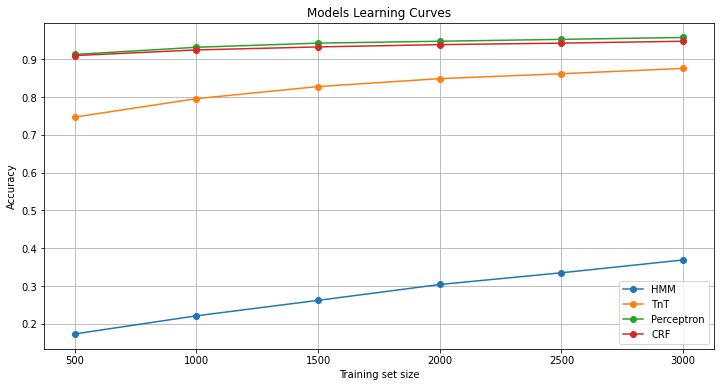

In [6]:
plt.figure(figsize=(12,6))
plt.plot(sentences_amount, HMM_results, 'o-')
plt.plot(sentences_amount, TnT_results, 'o-')
plt.plot(sentences_amount, PER_results, 'o-')
plt.plot(sentences_amount, CRF_results, 'o-')
plt.title('Models Learning Curves')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(['HMM', 'TnT', 'Perceptron', 'CRF'])
plt.grid()
plt.show()

**Which model would you select? Justify the answer.**

I would select Perceptron model as it has the highest accuracy compared to the other 3 models. 

It is important to explain that the test and training set are disjoint sets as no sentence in one set is included in the other one. Consequently, as the accuracy is obtained from the test set and the models have been trained using the training set, it should not have overfitting.

Moreover, I would select Perceptron (or maybe CRF model) because it requires less samples to get a high accuracy compared to TnT model or HMM model, which require a huge amount of sentences to get at least 0.37 of accuracy.

### 2.2 Tagging Example
The last way that will be used to measure the performance of the models will consist in taking the sentence of the provided *Jupyter Notebooks* in order to analyze if the words of the sentence are correctly tagged using the best model of *HMM*, *TnT*, *Perceptron*, *CRF*:

In [7]:
sentence = ['the', 'men', 'attended', 'to', 'the', 'meetings']

print("HMM:\n" +  str(HMM[5].tag(sentence)))
print("TnT:\n" +  str(TnT[5].tag(sentence)))
print("Perceptron:\n" +  str(PER[5].tag(sentence)))
print("CRF:\n" +  str(CRF[5].tag(sentence)))

HMM:
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
TnT:
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
Perceptron:
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
CRF:
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]


In this example, all words are correctly tagged as the four models are enough accurate to tag them. Nevertheless, if the tagging difficulty increments, HMM model is likely to make mistakes while tagging as its accuracy is lower than the rest of models.